In [1]:
import faiss
from chess2vec import load_binary
import gzip
import numpy as np
from utils import sample, show_boards

rng = np.random.default_rng(42)

In [2]:
with gzip.open("data/bin/lichess_elite_2023-10_labels", "rt") as fl:
    mat, labels = load_binary(fl, return_labels=True, count=100_000)

In [3]:
index = faiss.IndexBinaryFlat(768)
index.add(mat)

In [4]:
query_vectors, query_labels = sample(rng, len(labels), 4, mat, labels)
distances, idx = index.search(query_vectors, k=5)

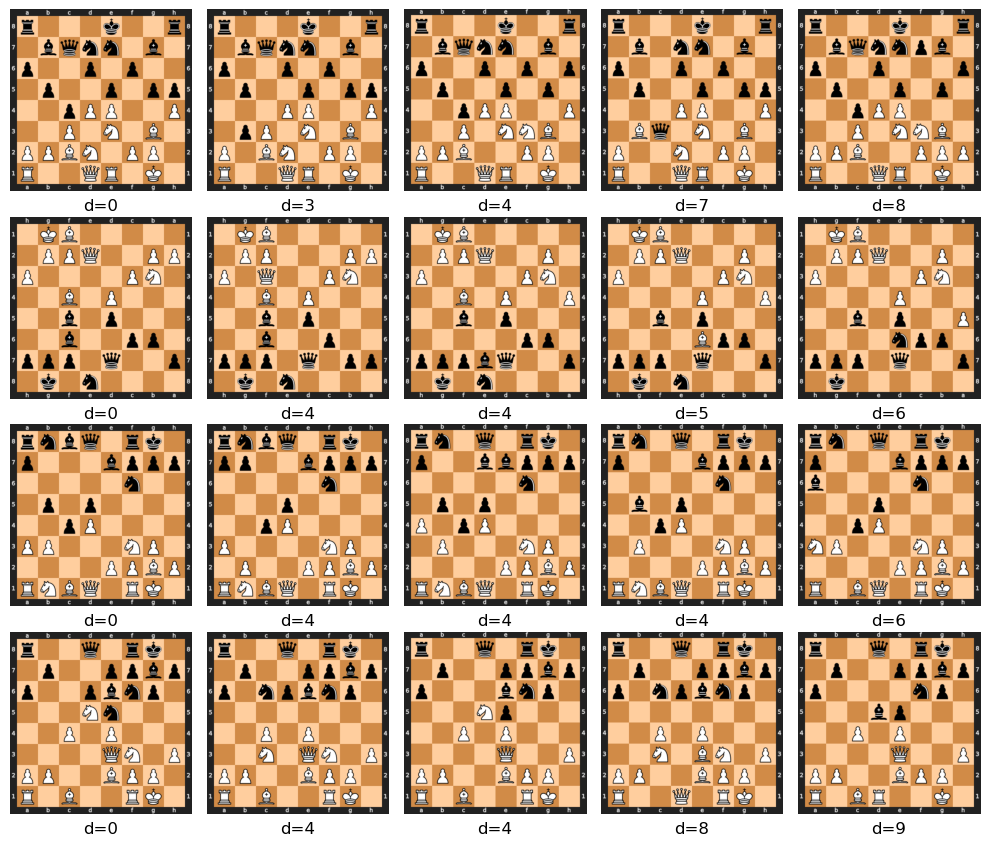

In [5]:
annot = [f"{d=}" for d in distances.ravel()]
show_boards(labels[idx].ravel(), annot, 4, 5, figsize=(10, 8.5))